In [1]:
#pip install matplotlib

In [2]:
#pip install seaborn

In [3]:
#pip install wordcloud

In [4]:
# Import all Libraries that are needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [5]:
# Load the dataset
comm_df = pd.read_csv('../data/all_comments_for_labeling_cleaned.csv', delimiter=';', encoding='utf-8')
# comm_df = comm_df.drop(columns=['Unnamed: 2'])

In [6]:
# 3. Quick Data Overview
print("Dataset Overview:")
print(comm_df.info())
print("\nFirst 5 rows:")
print(comm_df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  1867 non-null   object
 1   source    1867 non-null   object
 2   label     1867 non-null   object
dtypes: object(3)
memory usage: 43.9+ KB
None

First 5 rows:
                                            comments   source     label
0                         fokus piala presiden kekny   tiktok  negative
1                 emyu cocoknya main di liga aja dah   tiktok  negative
2  sudah bisa di pastikan degradasi gk sih di mus...   tiktok  negative
3                                     ya puasa gelar   tiktok  negative
4    happy banget cuma di keberuntungan datang terus  youtube  positive


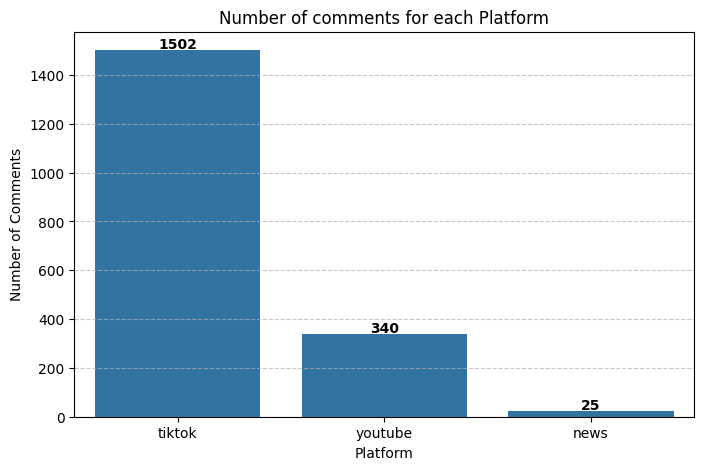

In [7]:
# 4. Number of Comments for each Platform
platform_counts = comm_df['source'].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Number of comments for each Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Comments')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(platform_counts.values):
    ax.text(i, v + 5, str(v), color='black', ha='center', fontweight='bold')

plt.show()

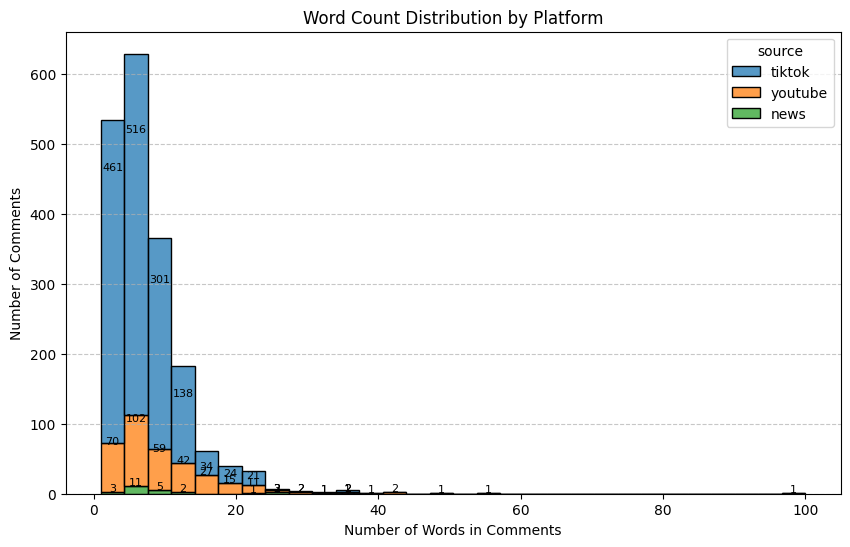

In [8]:
# 5. word count for each comment
comm_df['text_length'] = comm_df['comments'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=comm_df, x='text_length', hue='source', multiple="stack", bins=30)
plt.title('Word Count Distribution by Platform')
plt.xlabel('Number of Words in Comments')
plt.ylabel('Number of Comments')
plt.grid(axis='y', linestyle='--', alpha=0.7)

max_height = ax.patches

for patch in max_height:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width()/2., height + 1, int(height), ha="center", fontsize=8)

plt.show()

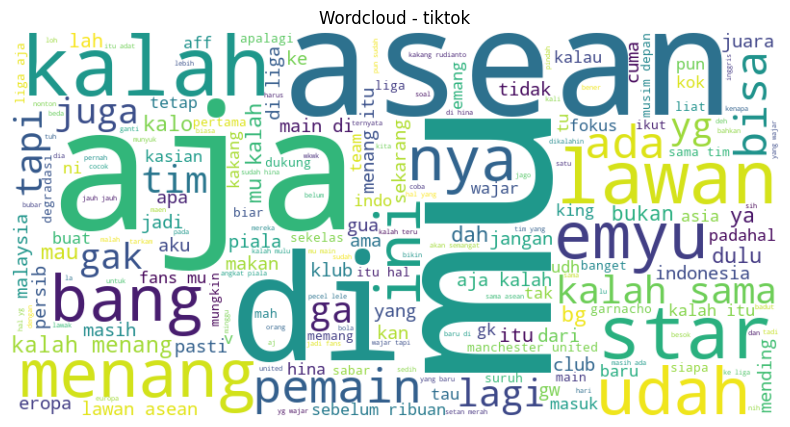

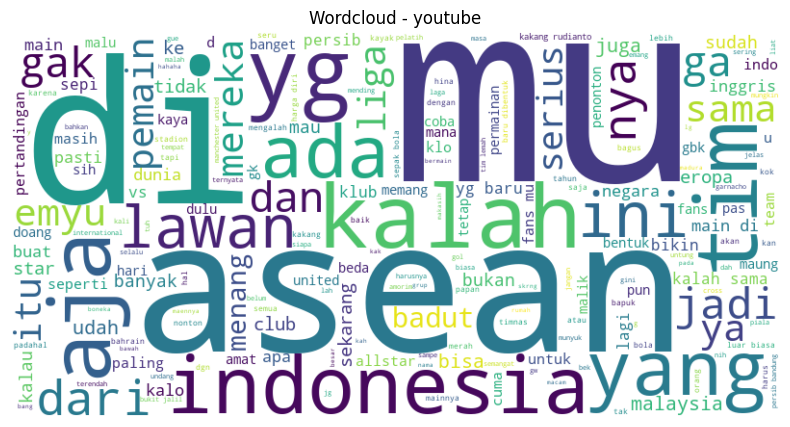

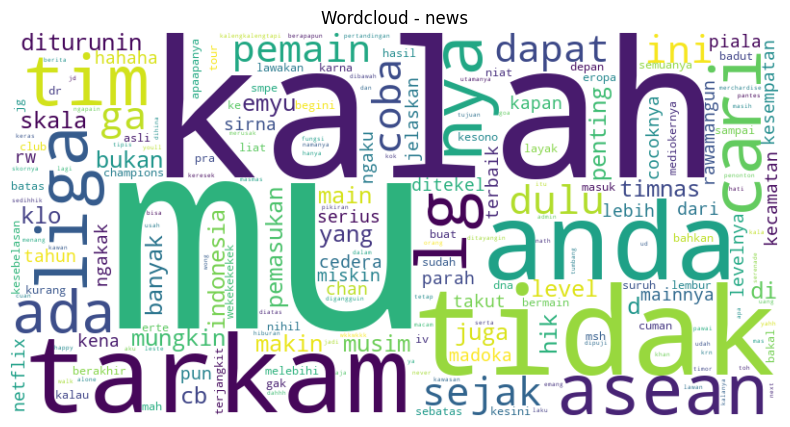

In [9]:
# 6. Wordcloud per Platform
for platform in comm_df['source'].unique():
    text = " ".join(comm_df[comm_df['source'] == platform]['comments'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud - {platform}')
    plt.show()

In [10]:
# Summary Statistics
print("\nSummary Statistics:")

#  Average comment length per platform
mean_word_count = comm_df.groupby('source')['text_length'].mean()
print("average comment length per platform:\n", mean_word_count)
print("\n")

# Maximum word length of comments per platform
max_word_count = comm_df.groupby('source')['text_length'].max()
print("maximum word length of comments per platform:\n", max_word_count)
print("\n")

# descriptive statistics
summary_stats = comm_df.groupby('source')['text_length'].describe()
print("Summary Statistics Word Count per Platform:\n", summary_stats)


Summary Statistics:
average comment length per platform:
 source
news       10.360000
tiktok      6.938083
youtube     9.911765
Name: text_length, dtype: float64


maximum word length of comments per platform:
 source
news        35
tiktok      37
youtube    100
Name: text_length, dtype: int64


Summary Statistics Word Count per Platform:
           count       mean       std  min  25%  50%   75%    max
source                                                          
news       25.0  10.360000  8.128551  3.0  6.0  7.0  10.0   35.0
tiktok   1502.0   6.938083  4.395143  1.0  4.0  6.0   9.0   37.0
youtube   340.0   9.911765  8.966235  1.0  5.0  7.0  12.0  100.0


## 📊 EDA Summary (Final Clean Dataset after Manual Labeling & Cleaning)

- **Total number of comments:** 1867
- **Platform distribution:**
  - TikTok: 1502 comments
  - YouTube: 340 comments
  - News: 25 comments

- **Comment length distribution (word count):**
  - **Average word count:**
    - TikTok: 6.94 words
    - YouTube: 9.91 words
    - News: 10.36 words
  - **Maximum word count:**
    - TikTok: 37 words
    - YouTube: 100 words
    - News: 35 words

- **Descriptive Statistics:**

| Platform | Count | Mean | Std | Min | 25% | 50% (Median) | 75% | Max |
| -------- | ----- | ----- | ----- | --- | --- | ----- | --- | --- |
| TikTok | 1502 | 6.94 | 4.40 | 1 | 4 | 6 | 9 | 37 |
| YouTube | 340 | 9.91 | 8.97 | 1 | 5 | 7 | 12 | 100 |
| News | 25 | 10.36 | 8.13 | 3 | 6 | 7 | 10 | 35 |

- **Preliminary Insights:**
  - Manual cleaning has successfully removed irrelevant comments, including spam and gambling-related content.
  - Sarcasm and humor detection required human judgment to assign accurate sentiment labels.
  - TikTok still dominates the dataset, but YouTube contributes more longer comments.
  - The dataset is now fully labeled, clean, and ready for model training.

In [13]:
'''import re

# Positive Keywords
positive_keywords = [
    'mengalah', 'happy', 'menghibur', 'settingan', 'keren', 'kerenn', 
    'mafia', 'biasa', 'bayar', 'dibayar', 'dbyar', 'bahagia',
    'leg', 'santai', 'setan merah', 'skil bagus', 'skill', 'saatnya bermain dan menang',
    'semangat', 'penat', 'takperlu alasan kami fans glory glory mancister united tatap di sini', 'asean menang',
    'sampai sini apakah mau tetap setia sama emyu bangwkk', 'menang', 'bagus', 'wajar bang beda zaman',
    'belom mode serius itu emyu lagian kan emyu jago nya di eropa bukan di asia tsunami trophy tunggu tahun',
    'berkembang', 'kala menang itu wajar', 'tim besar'
]

# Negative Keywords
negative_keywords = [
    'lawak', 'badut', 'goa', 'masuk goa', 'bubarin', 'bubarkan', 
    'piala presiden', 'presiden', 'komedi', 'puncak komedi', 'pindah liga',
    'kahsian', 'kasian', 'kasiaaan', 'marah', 'puasa', 'puasa gelar', 'lucu',
    'wajar gak sih', 'ayam ayamin', 'kocak', 'emyukocak', 'kalah', 'klah',
    'diselamatkan', 'di selamatkan', 'degradasi', 'liga', 'aib', 'dark sistem',
    'memalukan', 'madura united', 'di dukung', 'dikantongi', 'dikantongin', 'sokong',
    'tarkam', 'tim lemah', 'berkutik', 'katanya bakal juara', 'ngelawak', 'nglawak',
    'menurun', 'gradasi', 'degradasi', 'pecel lele', 'antah berantah', 'mutidur dek', 'anj', 'anjjj',
    'pengalaman', 'malu', 'tidak pantas', 'belum tentu menang', 'keterlaluaaan', 'kekalahan', 'kasihan',
    'tim papan bawah', 'mitra kukar', 'lemah', 'makan', 'tsunami', 'munyuk munyuk', 'bapuk',
    'kembalikan ferguson', 'pecel', 'mending', 'sehinaa itu kah emyu sekarang', 'sir alex ferguson ketawa melihatnya',
    'zonk', 'dikalahin', 'bubar', 'persib', 'akrab', 'my', 'speechless', 'king mu', 'manchester united udah enggak sperti dlu',
    'munyukk munyukkkk', 'udh kebangetan mu', 'kayaknya emang udah ngga bisa menang tuh klub', 'mumu',
    'kiper bangkok united lebih bagus dr onana kahh', 'bot', 'gagal', 'udah ga', 'all stars menang', 'ini beneran',
    'bgebadut'
]

# Pattern laughter (masih sebagai negatif)
laughter_pattern = re.compile(r'\b(wk+|ha+)', re.IGNORECASE)

# Function hybrid labeling
def label_comment(text):
    text = text.lower()
    
    # Pattern laughter duluan
    if laughter_pattern.search(text):
        return 'negative'
    
    # Check negative keywords
    if any(re.search(rf'\b{re.escape(kw)}\b', text) for kw in negative_keywords):
        return 'negative'
    
    # Check positive keywords
    elif any(re.search(rf'\b{re.escape(kw)}\b', text) for kw in positive_keywords):
        return 'positive'
    
    else:
        return 'neutral'

# Apply labeling
comm_df['auto_label'] = comm_df['comments'].apply(label_comment)

# Distribusi hasil labeling
print(comm_df['auto_label'].value_counts())
'''


"import re\n\n# Positive Keywords\npositive_keywords = [\n    'mengalah', 'happy', 'menghibur', 'settingan', 'keren', 'kerenn', \n    'mafia', 'biasa', 'bayar', 'dibayar', 'dbyar', 'bahagia',\n    'leg', 'santai', 'setan merah', 'skil bagus', 'skill', 'saatnya bermain dan menang',\n    'semangat', 'penat', 'takperlu alasan kami fans glory glory mancister united tatap di sini', 'asean menang',\n    'sampai sini apakah mau tetap setia sama emyu bangwkk', 'menang', 'bagus', 'wajar bang beda zaman',\n    'belom mode serius itu emyu lagian kan emyu jago nya di eropa bukan di asia tsunami trophy tunggu tahun',\n    'berkembang', 'kala menang itu wajar', 'tim besar'\n]\n\n# Negative Keywords\nnegative_keywords = [\n    'lawak', 'badut', 'goa', 'masuk goa', 'bubarin', 'bubarkan', \n    'piala presiden', 'presiden', 'komedi', 'puncak komedi', 'pindah liga',\n    'kahsian', 'kasian', 'kasiaaan', 'marah', 'puasa', 'puasa gelar', 'lucu',\n    'wajar gak sih', 'ayam ayamin', 'kocak', 'emyukocak', '

In [14]:
# comm_df[comm_df['auto_label'] == 'neutral']